# Task 2: To explore supervised Machine Learning
# Score prediction of school students 
To Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables.

**Author: Syed Shahid Shabir Qadri**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
# loading the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data loaded successfully")

Data loaded successfully


In [ ]:
#printing the top 10 rows 
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#checking for null values and dropping them if any is there
df.isnull().sum()
df.dropna()
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


To find a visual relation between our two variables "study hours and percentage scores" we will plot a 2-D graph.



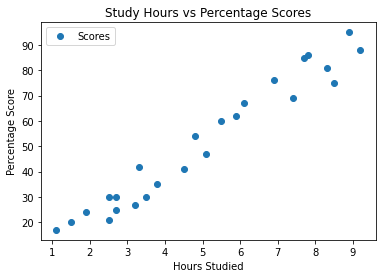

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, you can clearly see there is a positive linear relation between the Hours Studied and Percentage scores

**Preparing our data**

Next is to define our "attributes"(input) variable and "labels"(output) by dividing our data

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

Now that we have the attributes and labels defined, the next step is to split this data into training and test sets in the ratio 80:20

In [ ]:
# Using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Training and testing datasets are ready for training our model

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 
First we will train by built-in function sklearn.linear_model.LinearRegression()
next we will create linear regression model by scratch and will compare the results

###**Using Scikit-Learn library**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [ ]:
line = regressor.coef_*X + regressor.intercept_
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.68207815]
Intercept -  2.826892353899737


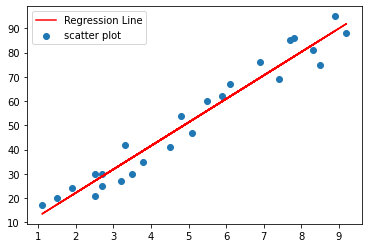

In [ ]:
# Plotting for the test data
plt.scatter(X, y, label="scatter plot")
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

###**Making the linear regression from scratch**

In [ ]:
y_train_new = y_train.reshape(-1,1)  
ones = np.ones([X_train.shape[0], 1]) # create a array containing only ones 
X_train_new = np.concatenate([ones, X_train],1) # concatenate the ones to X matrix

In [ ]:
# creating the theta matrix
# notice small alpha value
alpha = 0.01
iters = 5000

theta = np.array([[1.0, 1.0]])
print(theta)

[[1. 1.]]


In [ ]:
# Cost Function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [ ]:
computeCost(X_train_new, y_train_new, theta)

1259.1955

In [ ]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum(((X @ theta.T) - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [ ]:
g, cost = gradientDescent(X_train_new, y_train_new, theta, alpha, iters)  
print("Intercept -", g[0][0])
print("Coefficient- ", g[0][1])
print("The final cost obtained after optimisation - ", cost)

Intercept - 2.8268715728809677
Coefficient-  9.682081515927122
The final cost obtained after optimisation -  15.727417763727209


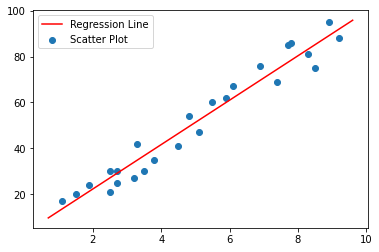

In [ ]:
# Plotting scatter points
plt.scatter(X, y, label='Scatter Plot')
axes = plt.gca()

# Plotting the Line
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()

Now if we look at graphs both are identical so our linear regression model is successful 
But making the model using the built-in functions is easy to implement than do it from scratch.

###**Testing the model**

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
comp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp_df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [ ]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9491209376364417
Test Score: 0.9678055545167994


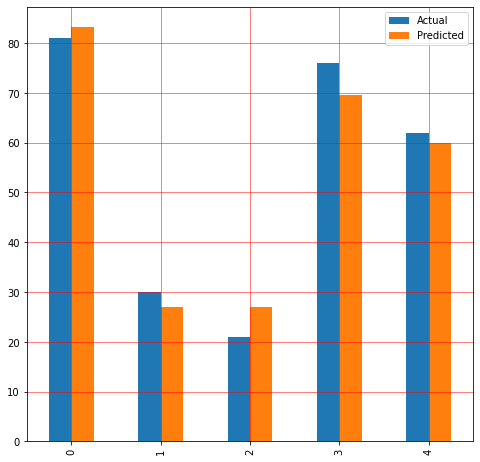

In [ ]:
#plotting the grid to depict the actual and predicted value
comp_df.plot(kind='bar',figsize=(8,8))#
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [ ]:
# Testing with some new data
hours = 8.4
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8.4
Predicted Score = 84.15634885132759


###**Evaluating the model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


**R-squared measures the goodness or accuracy of a model, sor ourmodel's accuracy is 96.78%**



###**THANK YOU**